<a href="https://colab.research.google.com/github/Springboard-CourseDev/MachineLearningForEngineers/blob/master/Solutions/Mini_Project_4_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Neural Network**

The curriculum introduced to be familier with the basic components of neural networks and how to train them using gradient descent-based algorithms and understand different graident descent algorithms. 
The objective of this mini project is :


*   Build and train neural networks on the House price prediction using Keras.
*   Understanding Graident descent.
*   Using different Graident descent algorithms.


In this project, you'll be using Keras and tensorflow to build a neural network for a house price prediction dataset. A large part of training a neural network is selecting the most appropriate optimizer and its hyperparameters. 



**Import Libraries**

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Mount google drive to access data or if you are using locally ignore this step

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Kaggle King County, WA datasets

[King County House price datasets](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction) consist of 21 different attributes related to house price.



---


Variable	   Description

---

*   **id** 	    Identification
*   **date**	Date sold
*   **price**	Sale price
*   **bedrooms**	  Number of bedrooms
*   **bathrooms**	  Number of bathrooms
*   **sqft_liv**	  Size of living area in square feet
*   **sqft_lot**	  Size of the lot in square feet
*   **floors**	  Number of floors
*   **waterfront**	‘1’ if the property has a waterfront, ‘0’ if not.
*   **view**	   An index from 0 to 4 of how good the view of the property was
*   **condition**	Condition of the house, ranked from 1 to 5
*   **grade**	  Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. Additional information in: KingCounty
*   **sqft_above**	Square feet above ground
*   **sqft_basmt**	Square feet below ground
*   **yr_built**	Year built
*   **yr_renov**	Year renovated. ‘0’ if never renovated
*   **zipcode**	5 digit zip code
*   **lat**	Latitude
*   **long**	Longitude
*   **squft_liv15**	Average size of interior housing living space for the closest 15 houses, in square feet
*   **squft_lot15**	Average size of land lots for the closest 15 houses, in square feet
*   **Shape_leng**	Polygon length in meters
*   **Shape_Area**	Polygon area in meters








**Read the Data**

Use the Pandas library to read in the dataset.





In [ ]:
df = pd.read_csv('/content/sample_data/kc_house_data.csv.zip')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.shape

(21613, 21)

Use `describe()` to get basic summary statistics for each of the columns. 

Can you tell features are continuous? 

Which features are nominal?

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


Are there any null values in the dataset? You can read about methods for dealing with null values [here](https://machinelearningmastery.com/handle-missing-data-python/). 

In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

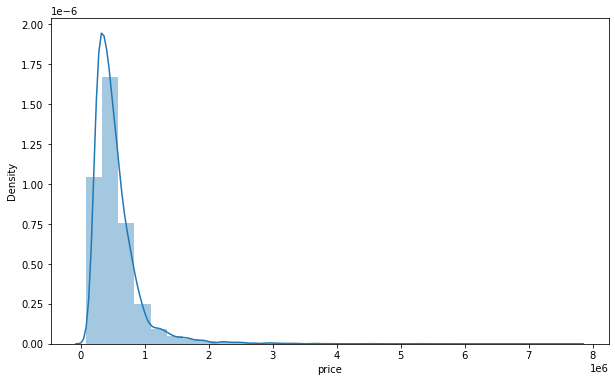

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'],bins=30)


There are 20 numeric variables with a correlation with price. We need to extraxt highly correlated feature with price.

In [ ]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


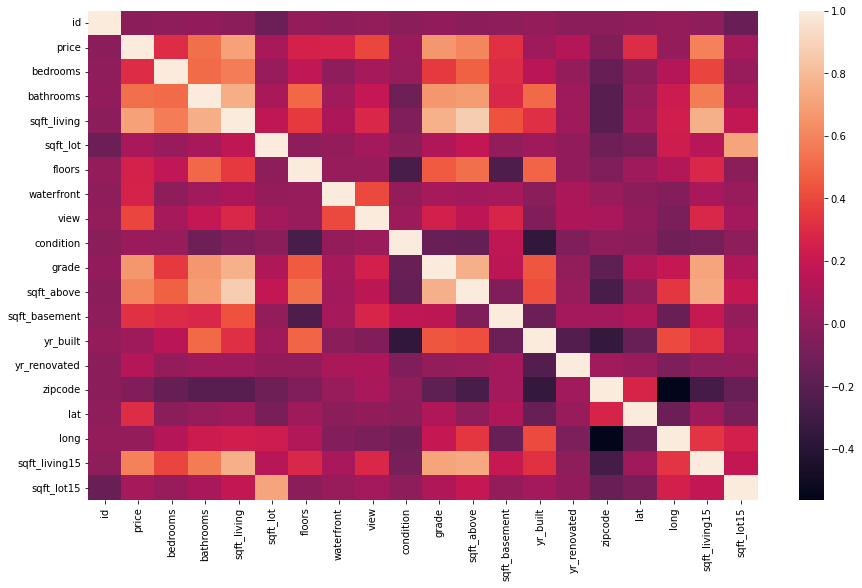

In [ ]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),cmap='rocket',cbar=True,yticklabels=True)

In [ ]:
df.corr()["price"].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

Here, sqft_living is highly positive correlated with price. Let's explore more to see how it effect with price. Whereas zipcode, id, date can be drop

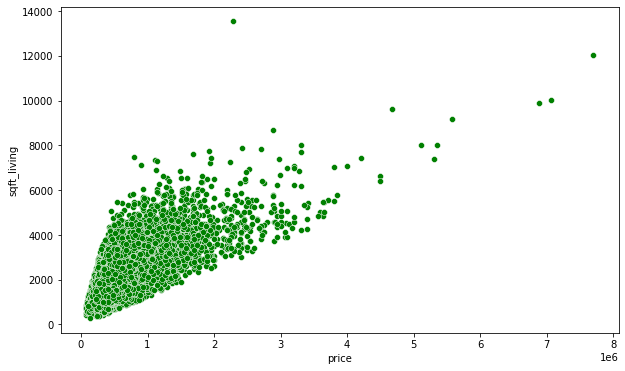

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="price",y="sqft_living",data=df,color="g",palette='viridis')

Text(0.5, 1.0, 'distribution of sqft_living')

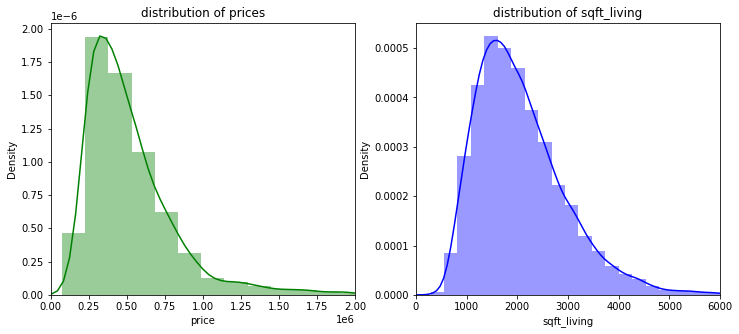

In [ ]:
fig=plt.figure(figsize=(12,5))
axis=fig.add_subplot(121)
sns.distplot(df['price'],color='g')
plt.ylim(0,None)
plt.xlim(0,2000000)
axis.set_title('distribution of prices')

axis=fig.add_subplot(122)
sns.distplot(df['sqft_living'],color='b')
plt.ylim(0,None)
plt.xlim(0,6000)
axis.set_title('distribution of sqft_living')

Text(0.5, 1.0, 'sqft_living vs price')

<Figure size 720x432 with 0 Axes>

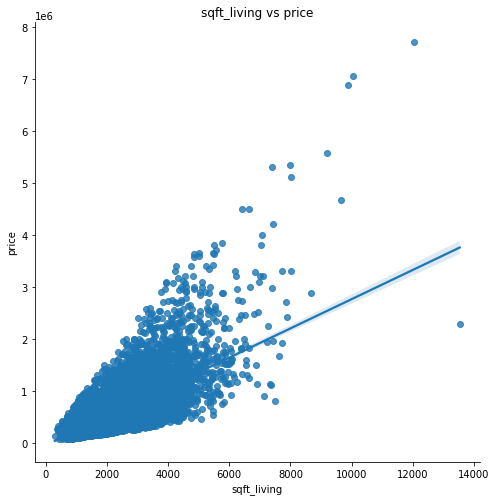

In [ ]:
plt.figure(figsize=(10,6))
sns.lmplot(x='sqft_living',y='price',palette='viridis',height=7,data=df)
plt.title('sqft_living vs price')


Here, price increases with sqft_living increase in size. So, it is positively correlated.

Now, separate data for training and label(Y)

In [ ]:
# Separate the data into X and Y
x=df.drop(["price","date","zipcode","id"],axis=1).values
y=df["price"].values

Let's split the data into training and validation sets.

In [ ]:
# Choose a train size, and split the data into a train and test set.
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=23)

Normalizing features by removing the mean and scaling to unit variance using [StandardScaler](https://https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)()

In [ ]:
# normalise the data.
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [ ]:
x_train.shape

(16209, 17)

**BASELINE MODEL Linear Regression Model**

As discussed in a previous project, it's always crucial to start off a machine learning project by building a solid baseline model. The baseline model should be quick to build while still yielding non-trivial performance. A simple baseline model is created to validate with other model and provide some idea how well are we doing.


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm=LinearRegression()
lm.fit(x_train,y_train)


LinearRegression()

In [ ]:
pred_lm = lm.predict(x_test)

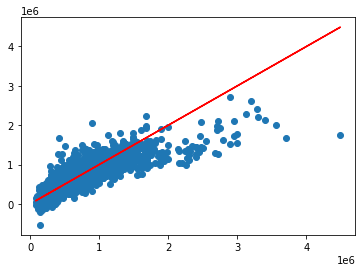

In [ ]:
# Our predictions
plt.scatter(y_test,pred_lm)

# Perfect predictions
plt.plot(y_test,y_test,'r')

## Model Evaluation.

Evaluation of model is done through [mean absolute error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html), [root mean squared error](https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/) and [Explained Variance score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.explained_variance_score.html)

What metric will you use to verify the regression problem?

What metric will you use to verify the classification problem?

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [ ]:
error_metrics=pd.DataFrame({'model':[],'mean absolute error':[],'root mean squared error':[],'Explained variance score':[]})

In [ ]:
Linear_model =['Linear Regression',mean_absolute_error(y_test,pred_lm),np.sqrt(mean_squared_error(y_test,pred_lm)),explained_variance_score(y_test,pred_lm)]

error_metrics.loc[0]= Linear_model

error_metrics

,model,mean absolute error,root mean squared error,Explained variance score
0,Linear Regression,125390.881233,191960.309211,0.696466


# Exercise Set 1

**Exercise:** Describe different components of neural network architecture and their function. 

[Neural network](https://https://www.analyticsvidhya.com/blog/2021/03/basics-of-neural-network/) is made up of vertically stacked components called **layers**. 
Neural consist of basic three layers:  

*   Input Layer: First layer that accept data
*   Hidden Layer: Consist of 1 or many.
*   Output Layer: Last layer of network, which send output.


Neural network works by adjusting of weight in the layer. The network iteratively adjusts weights and measures performance, continuing this procedure until the predictions are sufficiently accurate or another stopping criterion is reached. The accuracy of prediction are determined by **loss function**. The best set of weights is done by optimiser. The optimization method used is **stochastic gradient descent**


Models in Keras are defined as a sequence of layers. We create a Sequential model and add layers one at a time until we are happy with our network architecture.

The first thing to get right is to ensure the input layer has the correct number of input features. This can be specified when creating the first layer with the input_shape argument and setting it to (17,) for presenting the 17 input variables as a vector.

`How do we know the number of layers?`

There are heuristics that you can use, and often the best network structure is found through a process of trial and error experimentation. Generally, you need a network large enough to capture the structure of the problem.

In this example, let’s use a fully-connected network structure with three layers. Fully connected layers are defined using the Dense class. You can specify the number of neurons or nodes in the layer as the first argument and the activation function using the activation argument.

Also, you will use the rectified linear unit activation function referred to as ReLU on the first two layers.

The Sequential API is a framework for creating models based on instances of the `sequential()` class. The model has one input variable, a hidden layer with two neurons, and an output layer with one output. Additional layers can be created and added to the model.

`Explain how backpropagation works in neural network?`


Let's start building simple neural network with input layer, hidden layer and output layer.

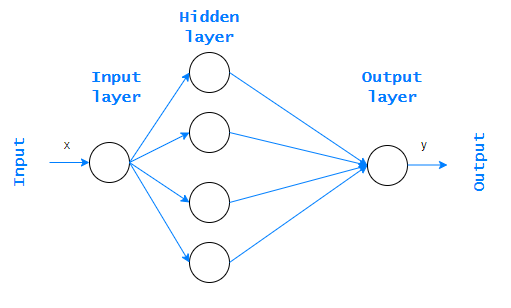

Reference: https://mtech-imaging-usa.com/building-neural-networks-with-tensorflow-net/

In [ ]:
model=Sequential()
model.add(Dense(19,activation="relu"))
model.add(Dense(19,activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")


We have our first layer as a dense layer with 19 neurons, ReLU activation and the input shape is 17 since we have 17 input features. Note that ‘Dense’ refers to a fully-connected layer, which is what we will be using. Our third layer is a dense layer with 1 neuron.
An [activation function](https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/#:~:text=for%20Output%20Layers-,Activation%20Functions,a%20layer%20of%20the%20network.) defines how the weighted sum of the input is transformed into an output from a node or nodes in a layer of the network. There are different types of activation function:


1.  Rectified Linear Activation (ReLU)
2.  Logistic (Sigmoid)
3.  Hyperbolic Tangent (Tanh)





In [ ]:
model.fit(x=x_train,y=y_train,
          validation_data=(x_test,y_test),
         batch_size=130,epochs=150,verbose=0)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                342       
                                                                 
 dense_1 (Dense)             (None, 19)                380       
                                                                 
 dense_2 (Dense)             (None, 1)                 20        
                                                                 
Total params: 742
Trainable params: 742
Non-trainable params: 0
_________________________________________________________________


What are trainable parameters and non-trainable parameters?


In [ ]:
y_pred=model.predict(x_test)

In [ ]:
Neural_Net =['Simple Neural Net',mean_absolute_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred)),explained_variance_score(y_test,y_pred)]

In [ ]:
error_metrics.loc[1]= Neural_Net
error_metrics

,model,mean absolute error,root mean squared error,Explained variance score
0,Linear Regression,125390.881233,191960.309211,0.696466
1,Simple Neural Net,136534.690159,200651.346772,0.669642


# **Vanishing Gradient Problem**
To understand Vanishing gradient problem, we need to know what is [backpropagation and gradient learning](https://https://medium.com/@cpittapa/backpropagation-and-gradient-descent-369e33fb7466).

During backpropagation gradients becomes so small that there are no updates to weights in some of the initial layers. The neural network’s initial layers becomes useless as they do not learn anything and the performance of the network becomes stagnant or bad. This is what we call [Vanishing Gradient Problem.](https://machinelearningmastery.com/how-to-fix-vanishing-gradients-using-the-rectified-linear-activation-function/)





*How can we solve the [Vanishing Gradients problem](https://https://www.analyticsvidhya.com/blog/2021/06/the-challenge-of-vanishing-exploding-gradients-in-deep-neural-networks/)?*


*   Weight Initialization
*   Non-saturating Activation Functions
*   Batch Normalization
*   Gradient Clipping



# Gradient Descent in Neural Network
Excerise:
1.   Explain how gradient descent works
2.   Explain differences between gradient descent algorithms (e.g AdaGrad, RMSProp, Adam)



The main goal of neural network algorithms is to minimize the difference between the predicted target value and the actual target value. This is also called Loss function or Cost function. We can minimize the loss function by finding the optimized value for weight and bias parameters. An algorithm which optimize the loss function is called an optimization algorithm. There are various optimization algorithm which are listed below:

*   RMSprop
*   Adagrad
*   Adadelta
*   Adam
*   Adamax
*   Stochastic Gradient Descent (SGD)

For more details about different optimization algorithm read through [source1](https://studymachinelearning.com/optimization-algorithms-in-neural-network/), [source 2](https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6) 


 


In [ ]:
def build_model(optimizer):
  model=Sequential()
  model.add(Dense(19,activation="relu"))
  model.add(Dense(19,activation="relu"))
  model.add(Dense(19,activation="relu"))
  model.add(Dense(1))
  model.compile(optimizer=optimizer,loss="mse")
  return model

Define different optimizers and verify the which one is better.

In [ ]:
optimizers = ['Adagrad','Adadelta', 'Adam', 'RMSprop']
optimizer_data = pd.DataFrame()
for i in optimizers:
  model = build_model(i)
  hist=model.fit(x_train, y_train, batch_size=120, epochs=50, verbose=0, validation_data=(x_test,y_test))
  optimizer_data[i]=hist.history['val_loss']
         

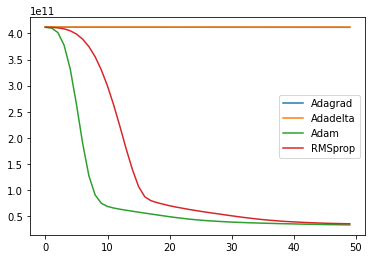

In [ ]:
optimizer_data.plot()

In above example we have seen how an optimization algorithms can affect the deep learning model in terms of accuracy, speed, and efficiency. We learned about various algorithms, and hopefully, we were able to compare the algorithms from one another. 

Adam is the best optimizers. If one wants to train the neural network in less time and more efficiently than Adam is the optimizer. It is widely used optimizer as well. 




## Deeper Neural Network

Diving into bit deeper network with more hidden layer to verify the accuracy of the model

In [ ]:
model=Sequential()
model.add(Dense(19,activation="relu"))
model.add(Dense(50,activation="relu"))
model.add(Dense(50,activation="relu"))
model.add(Dense(50,activation="relu"))
model.add(Dense(50,activation="relu"))
model.add(Dense(50,activation="relu"))
model.add(Dense(1))
model.compile(optimizer='adam',loss="mse")

Training with high epoch is time consuming and can result in overfitting. Keras provide callback function( [early_stopping](https://https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/)) that allows you to specify the performance measure to monitor, the trigger, and once triggered, it will stop the training process. 

In [ ]:
# Train the model
early_stopping = EarlyStopping(patience=10)
model.fit(x=x_train,y=y_train,
          validation_data=(x_test,y_test),
         batch_size=130,epochs=550,verbose=1,validation_split=0.2, callbacks=[early_stopping])

Epoch 1/550
100/100 [==============================] - 1s 4ms/step - loss: 434799149056.0000 - val_loss: 390131646464.0000
Epoch 2/550
100/100 [==============================] - 0s 3ms/step - loss: 176266543104.0000 - val_loss: 52978356224.0000
Epoch 3/550
100/100 [==============================] - 0s 3ms/step - loss: 52646342656.0000 - val_loss: 43712245760.0000
Epoch 4/550
100/100 [==============================] - 0s 3ms/step - loss: 46387118080.0000 - val_loss: 39464472576.0000
Epoch 5/550
100/100 [==============================] - 0s 3ms/step - loss: 43028647936.0000 - val_loss: 37178691584.0000
Epoch 6/550
100/100 [==============================] - 0s 3ms/step - loss: 40851501056.0000 - val_loss: 35663679488.0000
Epoch 7/550
100/100 [==============================] - 0s 3ms/step - loss: 39538954240.0000 - val_loss: 34565169152.0000
Epoch 8/550
100/100 [==============================] - 0s 3ms/step - loss: 38633000960.0000 - val_loss: 33798406144.0000
Epoch 9/550
100/100 [========

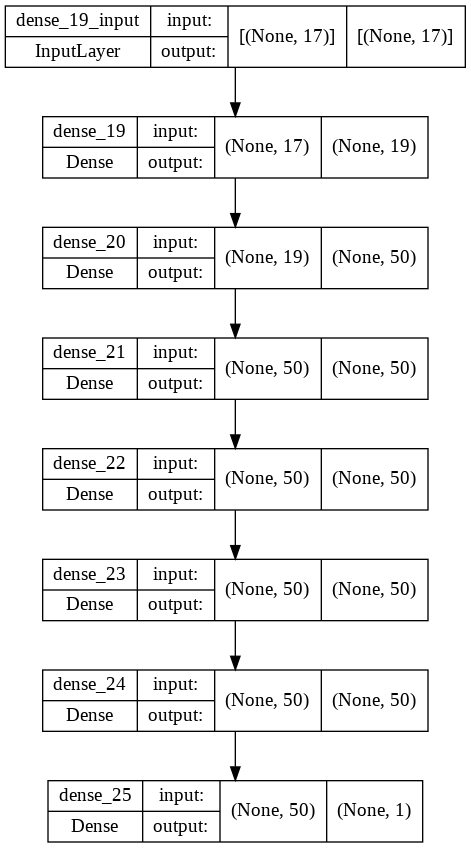

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 19)                342       
                                                                 
 dense_20 (Dense)            (None, 50)                1000      
                                                                 
 dense_21 (Dense)            (None, 50)                2550      
                                                                 
 dense_22 (Dense)            (None, 50)                2550      
                                                                 
 dense_23 (Dense)            (None, 50)                2550      
                                                                 
 dense_24 (Dense)            (None, 50)                2550      
                                                                 
 dense_25 (Dense)            (None, 1)                

In [ ]:
loss=pd.DataFrame(model.history.history)
loss.head()

,loss,val_loss
0,4.343167e+11,3.839913e+11
1,1.624874e+11,4.674912e+10
2,4.991012e+10,4.108748e+10
3,4.485700e+10,3.751615e+10
4,4.220253e+10,3.541861e+10


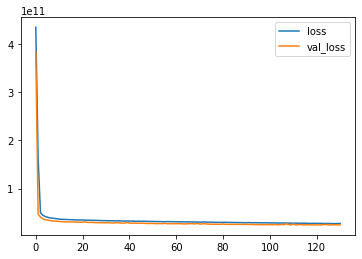

In [ ]:
loss.plot()

If both lines are coincide then our model is not overfitting, if we get spikes in our plot then model is overfitting

In [ ]:
y_pred=model.predict(x_test)

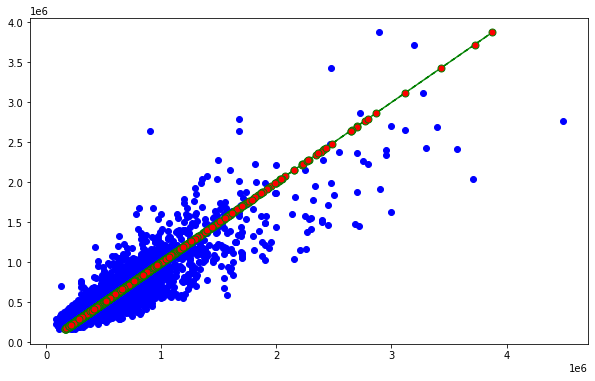

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,color="blue",marker="o")
plt.plot(y_pred,y_pred,marker='o',
         color='green',markerfacecolor='red',
         markersize=7,linestyle='dashed')

In [ ]:
Deep_Net =['Deep Net',mean_absolute_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred)),explained_variance_score(y_test,y_pred)]

In [ ]:
error_metrics.loc[2]= Deep_Net

In [ ]:
error_metrics

,model,mean absolute error,root mean squared error,Explained variance score
0,Linear Regression,125390.881233,191960.309211,0.696466
1,Simple Neural Net,153593.524436,217360.163890,0.617399
2,Deep Net,99317.162229,161454.605781,0.786407


Hence, MAE and RMSE is much lower in Deep Neural Network compare to Linear regression. Hence final model is better than baseline model.